In [1]:
# import required libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet

In [2]:
test_path = Path('data/new_renamed_store3_data.csv')
test_data = pd.read_csv(test_path)
test_data.head()

,Year,Week,Monthn,Sales,Gallons,date
0,2007,47,11,0.00,NaN,2007-11-19
1,2007,48,11,4697.64,148.0,2007-11-26
2,2007,49,12,3233.57,88.0,2007-12-03
3,2007,50,12,4526.86,133.0,2007-12-10
4,2007,51,12,7291.96,250.0,2007-12-17


In [3]:
final_test_data = test_data[['date', 'Sales', 'Gallons']]
final_test_data.head()

,date,Sales,Gallons
0,2007-11-19,0.00,NaN
1,2007-11-26,4697.64,148.0
2,2007-12-03,3233.57,88.0
3,2007-12-10,4526.86,133.0
4,2007-12-17,7291.96,250.0


In [21]:
# convert date column to datetime format for plotting
final_test_data['date'] = pd.to_datetime(final_test_data['date'])
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     992 non-null    datetime64[ns]
 1   Sales    990 non-null    float64       
 2   Gallons  989 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.4 KB


C:\Users\thw42\AppData\Local\Temp\ipykernel_16688\3757640022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_data['date'] = pd.to_datetime(final_test_data['date'])


<Axes: xlabel='date'>

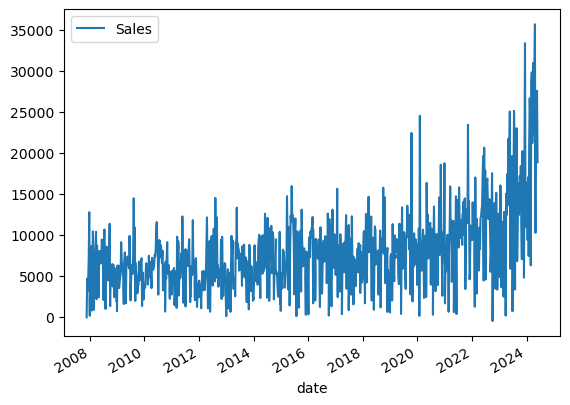

In [23]:
final_test_data.plot.line(
    x= 'date',
    y= 'Sales'
)

In [28]:
output_notebook()

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(final_test_data)

# Create a figure
p = figure(x_axis_type='datetime', title='Sales and Gallons Over Time')
# p.line(x='date', y='Sales', source=source, line_width=2, legend_label='Sales', color='blue')
p.circle(x='date', y='Sales', source=source, size=8, color='blue', legend_label='Sales')
p.line(x='date', y='Gallons', source=source, line_width=2, legend_label='Gallons', color='green')
# p.circle(x='date', y='Gallons', source=source, size=8, color='green', legend_label='Gallons')


# Customize the plot
# p.legend.location = 'top_left'
# p.xaxis.axis_label = 'Date'
# p.yaxis.axis_label = 'Sales'
# p.grid.grid_line_alpha = 0.3

# Show the plot
show(p)

Loading BokehJS ...

In [25]:
# final_test_data.head()
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     992 non-null    datetime64[ns]
 1   Sales    990 non-null    float64       
 2   Gallons  989 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.4 KB


In [29]:
from pandas.plotting import lag_plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


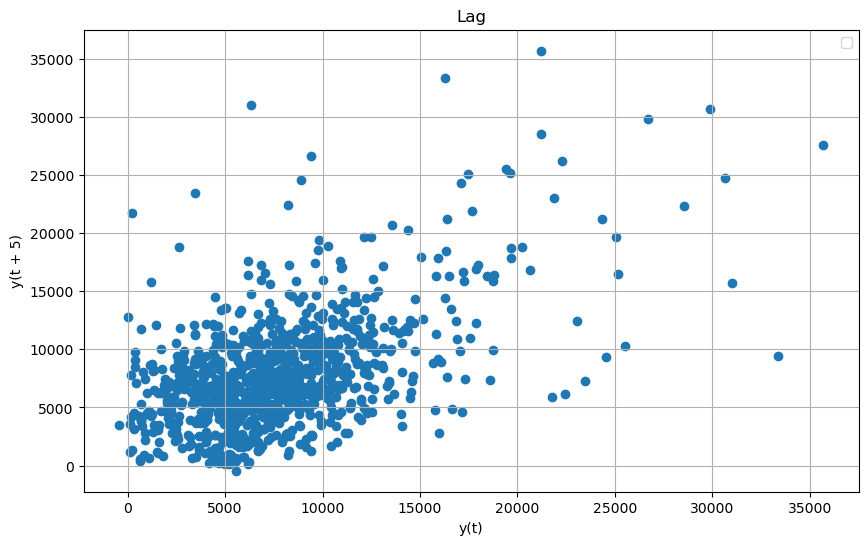

In [30]:
fig = plt.figure(figsize=(10, 6))
lag_plot(final_test_data['Sales'], lag=5)
plt.title('Lag')
plt.grid(True)
plt.legend();